In [ ]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ETL Pipeline from SQL to python

In [ ]:
# create engine to connect to Microsoft SQL to database
server = 'LAPTOP-PG979IBO\SQLEXPRESS'
database = 'JustTaxiDB'
engine = create_engine('mssql+pyodbc://{}/{}?driver=SQL Server'.format(server, database))

In [ ]:
connection =  engine.connect()
cursor = connection.execute('SELECT * FROM features')
featuresdf = pd.DataFrame(data=cursor.fetchall(), columns=cursor.keys())
cursor = connection.execute('SELECT * FROM labels')
labelsDf = pd.DataFrame(data=cursor.fetchall(), columns=cursor.keys())
connection.close()

In [ ]:
featuresdf.head()

,ID,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed
0,1,1.202591e+12,3.000,353.0,1.228867,8.900100,3.986968,0.008221,0.002269,-0.009966,1362.0,0.000000
1,2,2.748779e+11,9.293,17.0,0.032775,8.659933,4.737300,0.024629,0.004028,-0.010858,257.0,0.190000
2,3,8.847633e+11,3.000,NaN,1.139675,9.545974,1.951334,-0.006899,-0.015080,0.001122,973.0,0.667059
3,4,1.073742e+12,3.900,126.0,3.871543,10.386364,-0.136474,0.001344,-0.339601,-0.017956,902.0,7.913285
4,5,1.056562e+12,3.900,50.0,-0.112882,10.550960,-1.560110,0.130568,-0.061697,0.161530,820.0,20.419409


In [ ]:
featuresdf.describe()

,ID,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed
count,7.460914e+06,7.460914e+06,7.317659e+06,7.269318e+06,7.263326e+06,7.247237e+06,7.380330e+06,7.301554e+06,7.321852e+06,7.291413e+06,7.337951e+06,7.348098e+06
mean,3.734862e+06,8.182897e+11,1.162474e+01,1.689599e+02,6.910065e-02,4.473269e+00,8.980677e-01,-1.744735e-03,2.227136e-04,-2.460716e-04,3.724240e+03,9.004590e+00
std,2.156316e+06,4.952452e+11,8.734583e+01,1.072919e+02,1.424415e+00,8.128116e+00,3.250699e+00,1.440551e-01,3.368266e-01,1.479346e-01,1.390670e+06,8.105850e+00
min,1.000000e+00,0.000000e+00,7.500000e-01,0.000000e+00,-3.898399e+01,-5.780019e+01,-7.844842e+01,-4.845575e+01,-5.734489e+01,-5.355445e+01,0.000000e+00,-2.000000e+00
25%,1.867449e+06,3.779571e+11,3.900000e+00,7.800000e+01,-5.087678e-01,-1.923828e+00,-9.275788e-01,-2.680969e-02,-2.995300e-02,-1.872738e-02,2.410000e+02,1.017197e+00
50%,3.734904e+06,8.074539e+11,4.241000e+00,1.687509e+02,6.130981e-02,9.081572e+00,7.788748e-01,-6.561279e-04,2.593994e-04,-3.051758e-05,5.190000e+02,7.527132e+00
75%,5.602311e+06,1.254130e+12,8.000000e+00,2.629368e+02,6.350620e-01,9.710449e+00,2.753416e+00,2.330017e-02,3.143085e-02,1.825996e-02,8.620000e+02,1.547698e+01
max,7.469656e+06,1.709397e+12,6.070101e+03,3.599995e+02,6.687346e+01,6.115936e+01,7.805576e+01,3.070942e+01,8.031496e+01,4.505986e+01,6.193165e+08,8.803725e+01


# Looking for outliers

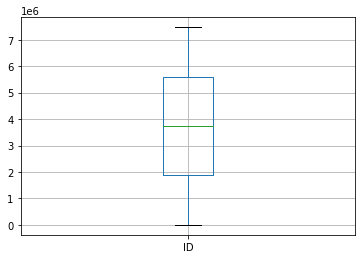

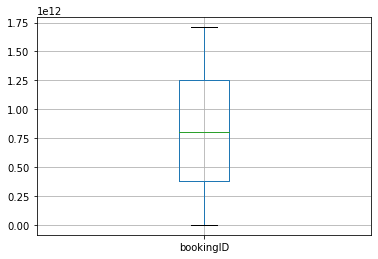

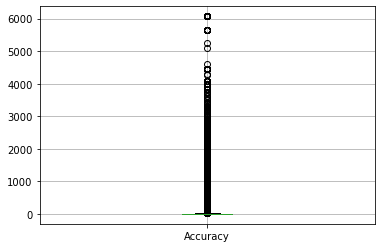

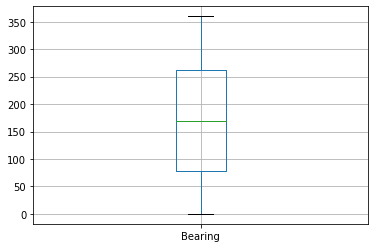

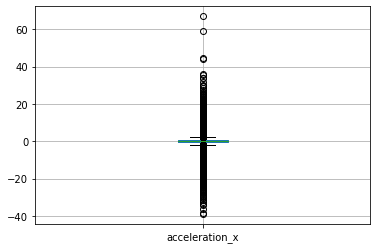

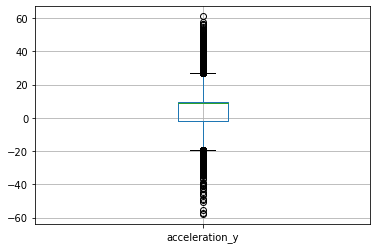

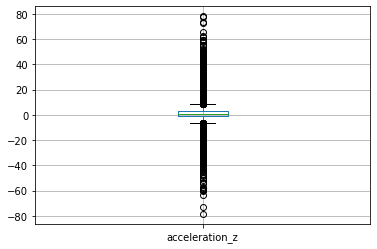

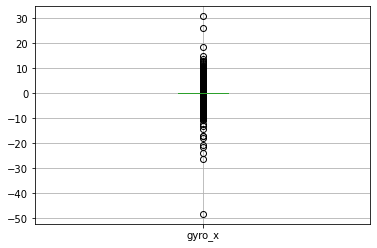

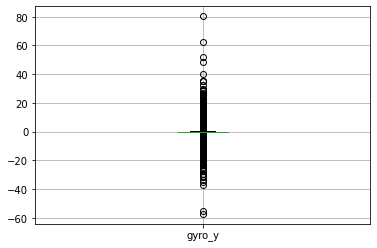

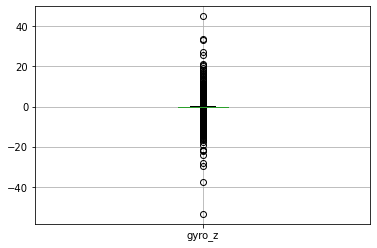

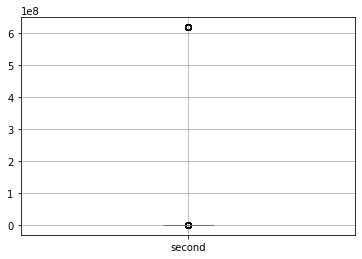

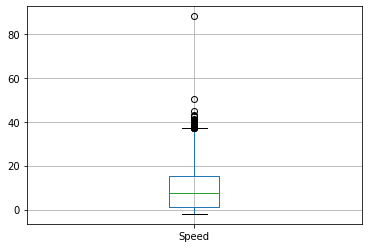

In [ ]:
import matplotlib.pyplot as plt

for column in featuresDf:
    plt.figure()
    featuresdf.boxplot([column])

There are a lot of outliers for each column. To prevent loss of data, not all outliers are going to be removed. We are just going to remove outliers that do not make sense. We are going to explore all the outliers for every column except for bookingID

# Remove all outliers

In [ ]:
#remove outliers in Accuracy
featuresdf=featuresdf.drop(featuresdf[featuresdf['Accuracy']>1500].index)

#remove outliers in acceleration_x
featuresdf=featuresdf.drop(featuresdf[(featuresdf['acceleration_x']<-10) | (featuresdf['acceleration_x']>10)].index)

#remove outliers in acceleration_y
featuresdf=featuresdf.drop(featuresdf[(featuresdf['acceleration_y']<-20) | (featuresdf['acceleration_y']>25)].index)

#remove outliers in acceleration_z
featuresdf=featuresdf.drop(featuresdf[(featuresdf['acceleration_z']<-15) | (featuresdf['acceleration_z']>15)].index)

#remove outliers in gyro_x
featuresdf=featuresdf.drop(featuresdf[(featuresdf['gyro_x']<-1) | (featuresdf['gyro_x']>1)].index)

#remove outliers in gyro_y
featuresdf=featuresdf.drop(featuresdf[(featuresdf['gyro_y']<-6) | (featuresdf['gyro_y']>6)].index)

#remove outliers in gyro_z
featuresdf=featuresdf.drop(featuresdf[(featuresdf['gyro_z']<-7) | (featuresdf['gyro_z']>7)].index)

#remove outliers in second
featuresdf=featuresdf.drop(featuresdf[featuresdf['second']>86400].index)

#remove outliers in Speed
featuresdf=featuresdf.drop(featuresdf[featuresdf['Speed']>25].index)

# Identifying Null Values

In [ ]:
## REMOVE RECORDS WITH MORE THAN ONE NULL VALUES
featuresdf=featuresdf.drop(featuresdf[featuresdf.isnull().sum(axis=1) >= 2].index)

In [ ]:
featuresdf.isnull().sum()

ID                     0
bookingID              0
Accuracy          138691
Bearing           185525
acceleration_x    191581
acceleration_y    207256
acceleration_z     78113
gyro_x            154623
gyro_y            134758
gyro_z            164174
second            119121
Speed             112193
dtype: int64

# Separating the datasets into 3 parts

Since the dataset was too large, we decided to split the dataset into 3 subsets

In [ ]:
bookingids=featuresdf['bookingID'].unique()
set1=featuresdf[featuresdf['bookingID'].isin(bookingids[:6659])]
set2=featuresdf[featuresdf['bookingID'].isin(bookingids[6659:13318])]
set3=featuresdf[featuresdf['bookingID'].isin(bookingids[13318:])]

set1.to_csv('set1.csv')
set2.to_csv('set2.csv')
set3.to_csv('set3.csv')